In [51]:
import pandas as pd 
import numpy as np

In [52]:
df = pd.read_excel("amazonLabelled.xlsx")
df = df[['Feedback','Sentiment']]
df.head()

,Feedback,Sentiment
0,"Good case, Excellent value.",Positive
1,Great for the jawbone.,Positive
2,Tied to charger for conversations lasting more...,Negative
3,The mic is great.,Positive
4,I have to jiggle the plug to get it to line up...,Negative


Performing Exploratory Data Analysis (EDA)

In [53]:
df.isnull().sum()

Feedback     0
Sentiment    0
dtype: int64

In [54]:
df.shape

(999, 2)

In [55]:
df.describe()

,Feedback,Sentiment
count,999,999
unique,989,2
top,Great phone!.,Positive
freq,2,500


In [56]:
df['Sentiment'].value_counts()

Positive    500
Negative    499
Name: Sentiment, dtype: int64

Converting the categorical date in numberical data: 

In [57]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Sentiment'] = lb.fit_transform(df['Sentiment'])
df.head()

,Feedback,Sentiment
0,"Good case, Excellent value.",1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0


CLeaning the 'TEXT' and Applying lemmatization

In [58]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [59]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
wordnet = WordNetLemmatizer()
Feedback = []
x=df['Feedback']
for i in range (len(x)):
    feedback = re.sub("[^a-zA-Z]"," ",x[i])
    feedback = feedback.lower()
    feedback = feedback.split()
    feedback = [wordnet.lemmatize(word) for word in feedback if word not in set(stopwords.words("english"))]
    feedback = " ".join(feedback)
    Feedback.append(feedback)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [60]:
dt=pd.DataFrame(Feedback,columns=['feedback'])
del df["Feedback"]
new_df=dt.join(df, how='outer')
new_df

,feedback,Sentiment
0,good case excellent value,1
1,great jawbone,1
2,tied charger conversation lasting minute major...,0
3,mic great,1
4,jiggle plug get line right get decent volume,0
...,...,...
994,screen get smudged easily touch ear face,0
995,piece junk lose call phone,0
996,item match picture,0
997,thing disappoint infra red port irda,0


In [61]:
#text is the column of feedback
text=new_df['feedback'].tolist()


In [62]:
#we assign a variable to Sentiment
y=new_df['Sentiment']

In [63]:
#Tokenize all the word present under text
from tensorflow.keras.preprocessing.text import Tokenizer
token=Tokenizer()
token.fit_on_texts(text)

In [64]:
#Count the individual word that hold unique index
vocab_size=len(token.word_index)+1
vocab_size

1565

In [65]:
print(token.index_word)

{1: 'phone', 2: 'great', 3: 'work', 4: 'good', 5: 'product', 6: 'headset', 7: 'quality', 8: 'battery', 9: 'sound', 10: 'one', 11: 'well', 12: 'ear', 13: 'use', 14: 'case', 15: 'would', 16: 'like', 17: 'time', 18: 'get', 19: 'excellent', 20: 'price', 21: 'recommend', 22: 'really', 23: 'problem', 24: 'make', 25: 'best', 26: 'call', 27: 'fit', 28: 'service', 29: 'charger', 30: 'nice', 31: 'love', 32: 'also', 33: 'new', 34: 'item', 35: 'worked', 36: 'money', 37: 'first', 38: 'buy', 39: 'better', 40: 'ever', 41: 'car', 42: 'bluetooth', 43: 'even', 44: 'look', 45: 'easy', 46: 'comfortable', 47: 'bought', 48: 'year', 49: 'reception', 50: 'could', 51: 'used', 52: 'charge', 53: 'poor', 54: 'thing', 55: 'happy', 56: 'purchase', 57: 'waste', 58: 'two', 59: 'made', 60: 'still', 61: 'bad', 62: 'device', 63: 'cell', 64: 'worst', 65: 'far', 66: 'long', 67: 'motorola', 68: 'day', 69: 'life', 70: 'fine', 71: 'camera', 72: 'enough', 73: 'piece', 74: 'got', 75: 'right', 76: 'volume', 77: 'design', 78: 'l

In [66]:
#From the indexed word now it assign index for each sentences
encoded_text=token.texts_to_sequences(text)
print(encoded_text)

[[4, 14, 19, 184], [2, 311], [665, 29, 185, 427, 129, 666, 23], [245, 2], [667, 83, 18, 186, 75, 18, 246, 76], [130, 428, 130, 668, 247, 669, 670, 248, 10, 10], [187, 671, 249], [672, 96, 429, 36], [57, 36, 17], [9, 7, 2], [97, 155, 188, 8, 430, 8], [58, 673, 674, 675, 189, 431, 676, 312, 677, 9, 6], [4, 7, 313], [77, 678, 12, 190, 46], [98, 21, 10, 250, 432, 1], [433, 314, 679], [65, 4], [3, 2], [680, 191, 156, 24, 681, 66, 682, 15, 78], [131, 67, 315, 683, 684, 50, 18, 316], [47, 13, 685, 434, 251, 686], [687, 688], [317, 318, 33, 8, 58, 157, 158, 68, 114, 192], [47, 689, 23, 8], [2, 252, 253, 1, 690], [435, 1, 84, 96, 25, 193, 1], [88, 194, 319, 195], [89, 691, 79, 115, 436, 437, 115, 1], [99, 52], [159, 116, 1, 13, 692, 693], [5, 694, 89, 16, 695, 12, 696], [438, 697, 41, 698, 699], [58, 48, 254, 700, 255, 1], [41, 29, 11, 701, 29, 320, 24, 196, 117, 318, 702, 703, 704], [132, 439, 705, 18, 1, 440, 17, 37, 133, 1, 8, 69, 706], [256, 11], [53, 115, 17, 257], [14, 2, 3, 70], [321, 5]

In [67]:
#Each sentence contains different number of words so we need padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_size=60
X=pad_sequences(encoded_text,maxlen=max_size,padding='post')
X

array([[   4,   14,   19, ...,    0,    0,    0],
       [   2,  311,    0, ...,    0,    0,    0],
       [ 665,   29,  185, ...,    0,    0,    0],
       ...,
       [  34,  346,   85, ...,    0,    0,    0],
       [  54, 1561, 1562, ...,    0,    0,    0],
       [ 654,   26,  113, ...,    0,    0,    0]], dtype=int32)

In [68]:
#After padding 
X.shape

(999, 60)

GLOVE VECTOR

In [69]:
glove_vectors=dict()

In [70]:
 #Extract glove model from preexisting twitter glove model
file=open('glove.twitter.27B.25d.txt',encoding='utf-8')
for line in file:
  values=line.split()
  word=values[0]
  vectors=np.asarray(values[1:])
  glove_vectors[word]=vectors
file.close()  

In [71]:
+len(glove_vectors.keys())

1193514

In [72]:
word_vector_matrix=np.zeros((vocab_size,25))
for word,index in token.word_index.items():
  vector=glove_vectors.get(word)
  if vector is not None:
    word_vector_matrix[index]=vector
  else:
    print(word)  

eargels
unacceptible
highy
bluetooths
purcashed
disapoinment
reccomendation
bougth
bluetoooth
earbugs
excrutiatingly
contstruct
ngage
riingtones
frequentyly
applifies
comparably
cingulair
hoursthe
thereplacement
earpad
accessoryone
motorolas
palmtop
sturdiness
incrediable
earset
wirefly
plantronincs
comfortible
replacementr
bitpim
flipphones
startac
krussel
tracfonewebsite
toactivate
blueant
supertooth
reoccure
securly
travled
bottowm
accessable
satisifed


MODEL BUILDING

In [73]:
X

array([[   4,   14,   19, ...,    0,    0,    0],
       [   2,  311,    0, ...,    0,    0,    0],
       [ 665,   29,  185, ...,    0,    0,    0],
       ...,
       [  34,  346,   85, ...,    0,    0,    0],
       [  54, 1561, 1562, ...,    0,    0,    0],
       [ 654,   26,  113, ...,    0,    0,    0]], dtype=int32)

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Activation,Dropout,LSTM,Bidirectional,SpatialDropout1D,SimpleRNN
#from tensorflow.keras.layers import Conv1D,MaxPooling1D,GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam


In [76]:
vec_size=25
model=Sequential()
model.add(Embedding(vocab_size,vec_size,input_length=max_size,weights=[word_vector_matrix],trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(100,dropout=0.3,recurrent_dropout=0.3,return_sequences=True))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(128,return_sequences=True,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
"""

"""
"""
model.add(Conv1D(64,8,activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1,activation='sigmoid'))
"""
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
25/25 [==============================] - 12s 362ms/step - loss: 0.6945 - accuracy: 0.5018 - val_loss: 0.6888 - val_accuracy: 0.5697
Epoch 2/30
25/25 [==============================] - 8s 335ms/step - loss: 0.6756 - accuracy: 0.5890 - val_loss: 0.6757 - val_accuracy: 0.5568
Epoch 3/30
25/25 [==============================] - 9s 379ms/step - loss: 0.6811 - accuracy: 0.5576 - val_loss: 0.6677 - val_accuracy: 0.5919
Epoch 4/30
25/25 [==============================] - 9s 359ms/step - loss: 0.7298 - accuracy: 0.6004 - val_loss: 0.6812 - val_accuracy: 0.5446
Epoch 5/30
25/25 [==============================] - 8s 337ms/step - loss: 0.6948 - accuracy: 0.5773 - val_loss: 0.6771 - val_accuracy: 0.5958
Epoch 6/30
25/25 [==============================] - 8s 332ms/step - loss: 0.6758 - accuracy: 0.5968 - val_loss: 0.6601 - val_accuracy: 0.6351
Epoch 7/30
25/25 [==============================] - 9s 344ms/step - loss: 0.6500 - accuracy: 0.6500 - val_loss: 0.5998 - val_accuracy: 0.7250
Epoch

In [77]:
score_lstm = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_lstm[0])
print('Test accuracy:', score_lstm[1])

Test loss: 0.5555012226104736
Test accuracy: 0.7448332905769348


In [78]:
vec_size=25
model1=Sequential()
model1.add(Embedding(vocab_size,vec_size,input_length=max_size,weights=[word_vector_matrix],trainable=False))
model1.add(SpatialDropout1D(0.3))
model1.add(Bidirectional(LSTM(100,dropout=0.3,recurrent_dropout=0.3,return_sequences=True)))
model1.add(Dense(1024,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Bidirectional(LSTM(128,return_sequences=True,activation='relu')))
model1.add(Dropout(0.2))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model1.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
25/25 [==============================] - 23s 664ms/step - loss: 0.6967 - accuracy: 0.5140 - val_loss: 0.6925 - val_accuracy: 0.5398
Epoch 2/30
25/25 [==============================] - 16s 621ms/step - loss: 0.6727 - accuracy: 0.6058 - val_loss: 0.6283 - val_accuracy: 0.6840
Epoch 3/30
25/25 [==============================] - 16s 626ms/step - loss: 0.6476 - accuracy: 0.6430 - val_loss: 0.5771 - val_accuracy: 0.7295
Epoch 4/30
25/25 [==============================] - 17s 674ms/step - loss: 0.6157 - accuracy: 0.6801 - val_loss: 0.5982 - val_accuracy: 0.7064
Epoch 5/30
25/25 [==============================] - 16s 636ms/step - loss: 0.6101 - accuracy: 0.6737 - val_loss: 0.5724 - val_accuracy: 0.7604
Epoch 6/30
25/25 [==============================] - 16s 622ms/step - loss: 0.6231 - accuracy: 0.6767 - val_loss: 0.5622 - val_accuracy: 0.7402
Epoch 7/30
25/25 [==============================] - 16s 631ms/step - loss: 0.5900 - accuracy: 0.7031 - val_loss: 0.5376 - val_accuracy: 0.7562

In [79]:
score_bilstm = model1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_bilstm[0])
print('Test accuracy:', score_bilstm[1])

Test loss: 0.4891940653324127
Test accuracy: 0.7685832977294922


In [80]:
vec_size=25
model2=Sequential()
model2.add(Embedding(vocab_size,vec_size,input_length=max_size,weights=[word_vector_matrix],trainable=False))
model2.add(SpatialDropout1D(0.3))
model2.add(SimpleRNN(100,dropout=0.3,recurrent_dropout=0.3,return_sequences=True))
model2.add(Dense(1024,activation='relu'))
model2.add(Dropout(0.2))
model2.add(SimpleRNN(128,return_sequences=True,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model2.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
25/25 [==============================] - 18s 668ms/step - loss: 0.6995 - accuracy: 0.5064 - val_loss: 0.6922 - val_accuracy: 0.5197
Epoch 2/30
25/25 [==============================] - 4s 148ms/step - loss: 0.6944 - accuracy: 0.5044 - val_loss: 0.6921 - val_accuracy: 0.5140
Epoch 3/30
25/25 [==============================] - 4s 141ms/step - loss: 0.6935 - accuracy: 0.5005 - val_loss: 0.6902 - val_accuracy: 0.5940
Epoch 4/30
25/25 [==============================] - 3s 132ms/step - loss: 0.6936 - accuracy: 0.4931 - val_loss: 0.6896 - val_accuracy: 0.5247
Epoch 5/30
25/25 [==============================] - 3s 130ms/step - loss: 0.6925 - accuracy: 0.5041 - val_loss: 0.6802 - val_accuracy: 0.5443
Epoch 6/30
25/25 [==============================] - 3s 131ms/step - loss: 0.6917 - accuracy: 0.5166 - val_loss: 0.6548 - val_accuracy: 0.7097
Epoch 7/30
25/25 [==============================] - 3s 130ms/step - loss: 0.6928 - accuracy: 0.5049 - val_loss: 0.6804 - val_accuracy: 0.5433
Epoch

In [92]:
score_rnn= model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_rnn[0])
print('Test accuracy:', score_rnn[1])


Test loss: 0.6031020879745483
Test accuracy: 0.7407500743865967


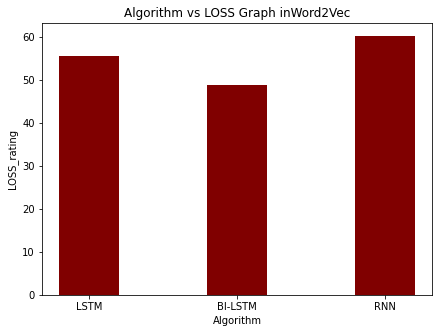

In [86]:
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'LSTM':score_lstm[0]*100, 'BI-LSTM':score_bilstm[0]*100,"RNN":score_rnn[0]*100}

Algorithm = list(data.keys())
LOSS = list(data.values())

fig = plt.figure(figsize = (7, 5))

plt.bar(Algorithm,LOSS, color ='maroon',
        width = 0.4)
 
plt.xlabel("Algorithm")
plt.ylabel("LOSS_rating")
plt.title("Algorithm vs LOSS Graph inWord2Vec")
plt.show()

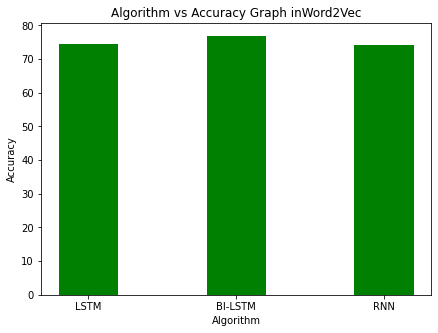

In [91]:
data1={'LSTM':score_lstm[1]*100, 'BI-LSTM':score_bilstm[1]*100,"RNN":score_rnn[1]*100}
Accuracy=list(data1.values())
fig = plt.figure(figsize = (7, 5))

plt.bar(Algorithm,Accuracy, color ='green',
        width = 0.4)
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Algorithm vs Accuracy Graph inWord2Vec")
plt.show()